# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [88]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


% %matplotlib inline

df = pd.read_csv('winequality_edited.csv')

In [89]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [90]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

print(mean_quality_high, mean_quality_low)

6.14608433735 5.47592067989


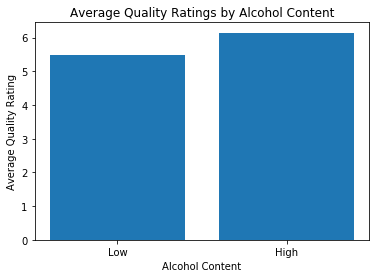

In [91]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [95]:
# Use query to select each group and get its mean quality
median_residual_sugar = df['residual_sugar'].median()

low_sug = df.query('residual_sugar < {}'.format(median_residual_sugar))
high_sug = df.query('residual_sugar >= {}'.format(median_residual_sugar))

In [96]:
# get mean quality

low_sug_mean=low_sug['quality'].mean()
high_sug_mean=high_sug['quality'].mean()

print(low_sug_mean, high_sug_mean)

5.80880074372 5.82782874618


#### NB:  2 required positional arguments when potting a bar chart : 'x' and 'height'
####           optionals: 
####                           tick_label= [' ', ' '] - x labels
####                           color=[] - specify list of colors as suitable
####                           alpha = number btwn 0 & 1 - contrast of color


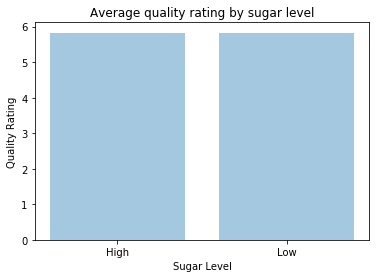

In [120]:
# Create a bar chart with proper labels
x=[1,2]
height=[low_sug_mean, high_sug_mean]
x_labels = ['High', 'Low']
plt.bar(x, height, tick_label = x_labels, alpha=0.4);
plt.title('Average quality rating by sugar level');
plt.xlabel('Sugar Level');
plt.ylabel('Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [98]:
df['acidity_levels'].unique().tolist()

['high', 'medium', 'mod_high', 'low', nan]

In [100]:
# Use groupby to get the mean quality for each acidity level
acid_means =  df.groupby('acidity_levels')['quality'].mean().to_dict()

acid_means

{'high': 5.783343040186372,
 'low': 5.8595933926302415,
 'medium': 5.850832266325224,
 'mod_high': 5.784540474741327}

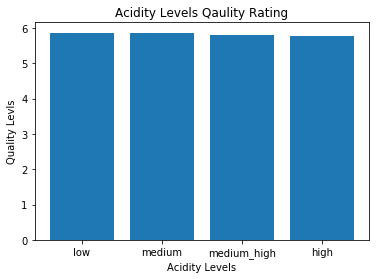

In [143]:
# Create a bar chart with proper labels
height=[acid_means['low'], acid_means['medium'], acid_means['mod_high'], acid_means['high']]
x=[1,2,3,4]
x_labels=['low','medium','medium_high','high' ]

plt.bar(x, height, tick_label= x_labels);
plt.title('Acidity Levels Qaulity Rating');
plt.xlabel('Acidity Levels');
plt.ylabel('Quality Levls');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

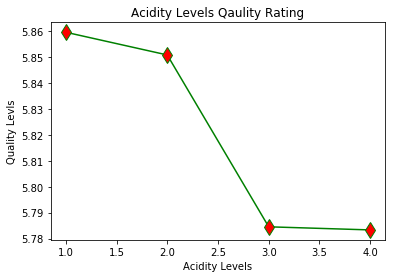

In [158]:
#NB: height = y axis
plt.plot(x, height, color='green', linestyle='solid',  marker='d',
     markerfacecolor='red', markersize=12,);
plt.title('Acidity Levels Qaulity Rating');
plt.xlabel('Acidity Levels');
plt.ylabel('Quality Levls');

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?